In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r'C:\Users\Jouke\Documents\evedata-logger\output\market_data_with_names_merged.csv', parse_dates=['date'])

In [10]:
# Sum volume for each item per day (if not already per day)
daily_volume = df.groupby(['type_id', 'date'])['volume'].sum().reset_index()

# Calculate average daily volume for each item
avg_daily_volume = daily_volume.groupby('type_id')['volume'].mean().reset_index()
avg_daily_volume.columns = ['type_id', 'avg_daily_volume']


In [11]:
# Spread is highest - lowest price each day
df['spread'] = df['highest'] - df['lowest']

# Average spread per item
avg_spread = df.groupby('type_id')['spread'].mean().reset_index()
avg_spread.columns = ['type_id', 'avg_bid_ask_spread']


In [12]:
item_names = df[['type_id', 'type_name']].drop_duplicates()


In [13]:
# Merge all metrics together
liquidity = avg_daily_volume.merge(avg_spread, on='type_id', how='left')
liquidity = liquidity.merge(item_names, on='type_id', how='left')

# Clean up and reset index
liquidity = liquidity[['type_id', 'type_name', 'avg_daily_volume', 'avg_bid_ask_spread']]
liquidity = liquidity.sort_values('avg_daily_volume', ascending=False).reset_index(drop=True)

# See the top 5 most liquid items
liquidity.head(5)


,type_id,type_name,avg_daily_volume,avg_bid_ask_spread
0,34,Tritanium,5.263983e+09,0.114986
1,35,Pyerite,2.737269e+09,0.964164
2,62516,Compressed Veldspar,8.341709e+08,0.647890
3,62517,Compressed Concentrated Veldspar,6.884992e+08,0.712712
4,36,Mexallon,6.420486e+08,3.635945


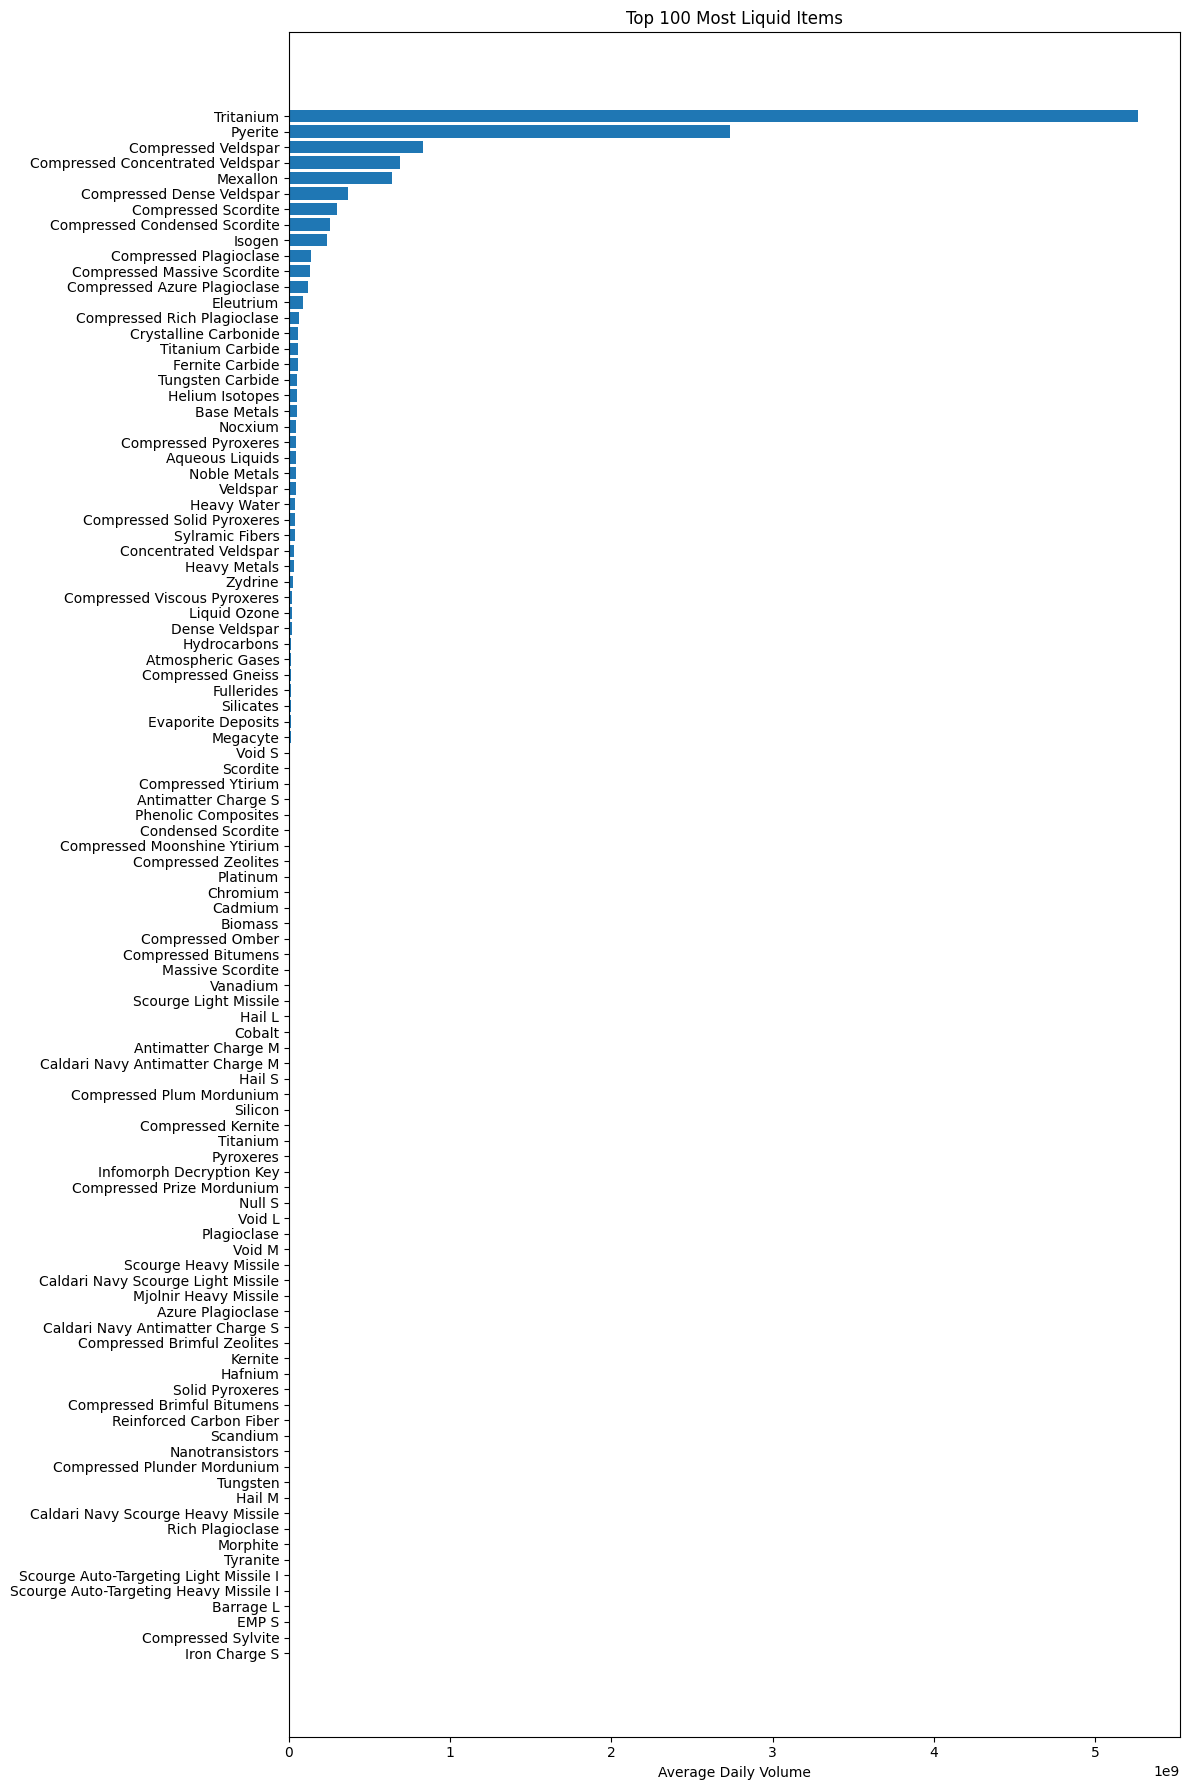

In [14]:
top_n = 100
plot_data = liquidity.head(top_n)

plt.figure(figsize=(12, 18))
plt.barh(plot_data['type_name'], plot_data['avg_daily_volume'])
plt.xlabel('Average Daily Volume')
plt.title(f'Top {top_n} Most Liquid Items')
plt.gca().invert_yaxis()  # Most liquid at the top
plt.tight_layout()
plt.show()
